# Determining correct thresholds with elbow method

In [7]:
import os
import json
import matplotlib.pyplot as plt
from kneed import KneeLocator

ANALYSIS_DATA_DIR = "threshold_analysis_data"

## Prepare data

Extract values from file

In [8]:
bumpy_data = {}
fpc_data = {}
lcom_data = {}


i = 2    
for filename in os.listdir(ANALYSIS_DATA_DIR):
    if filename.endswith(".json"):  # Adjust for file format
        filepath = os.path.join(ANALYSIS_DATA_DIR, filename)
        with open(filepath, "r") as file:
            json_object = json.load(file)
            projects = [{"project_id": key, **value} for key, value in json_object.items()]
            bumpy_sum_score = 0
            fpc_sum_score = 0
            lcom_sum_score = 0

            for project in projects:
                bumpy_sum_score += project["bumpy_score"]
                fpc_sum_score += project["fpc_score"]
                lcom_sum_score += project["lcom5_score"]
                
            bumpy_data[i] = bumpy_sum_score
            fpc_data[i] = fpc_sum_score
            lcom_data[i] = lcom_sum_score
        i += 1

print(bumpy_data)
print(fpc_data)
print(lcom_data)

{2: 1102, 3: 673, 4: 324, 5: 168, 6: 101, 7: 55, 8: 34, 9: 19, 10: 14}
{2: 921, 3: 184, 4: 95, 5: 21, 6: 13, 7: 8, 8: 5, 9: 2, 10: 1}
{2: 499, 3: 205, 4: 124, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}


Convert data

In [9]:
bumpy_x = list(bumpy_data.keys())  # Thresholds
bumpy_y = list(bumpy_data.values())  # Total alerts

fpc_x = list(fpc_data.keys())  # Thresholds
fpc_y = list(fpc_data.values())  # Total alerts

lcom_x = [1 + ((t-1)*3)/9 for t in lcom_data.keys()] 
lcom_y = list(lcom_data.values())  # Total alerts

## Plot elbows

### Bumpy road

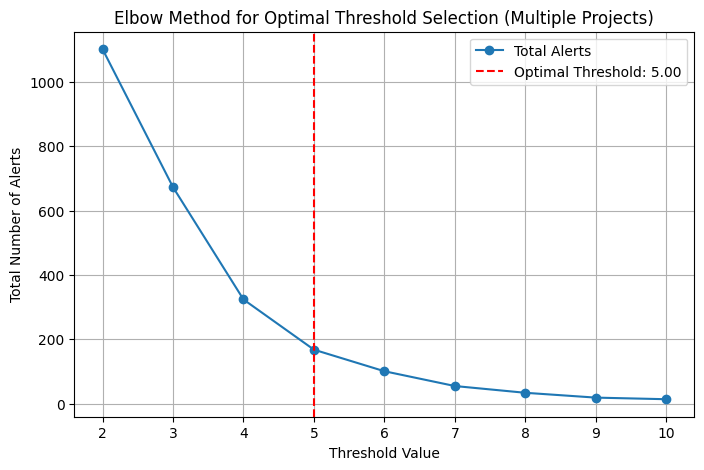

✅ Optimal threshold found: 5


In [10]:
# Find the elbow point
knee = KneeLocator(bumpy_x, bumpy_y, curve="convex", direction="decreasing")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(bumpy_x, bumpy_y, marker='o', label="Total Alerts")
plt.axvline(x=knee.knee, color='r', linestyle="--", label=f"Optimal Threshold: {knee.knee:.2f}")
plt.xlabel("Threshold Value")
plt.ylabel("Total Number of Alerts")
plt.title("Elbow Method for Optimal Threshold Selection (Multiple Projects)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Optimal threshold found: {knee.knee}")

### Function parameter count

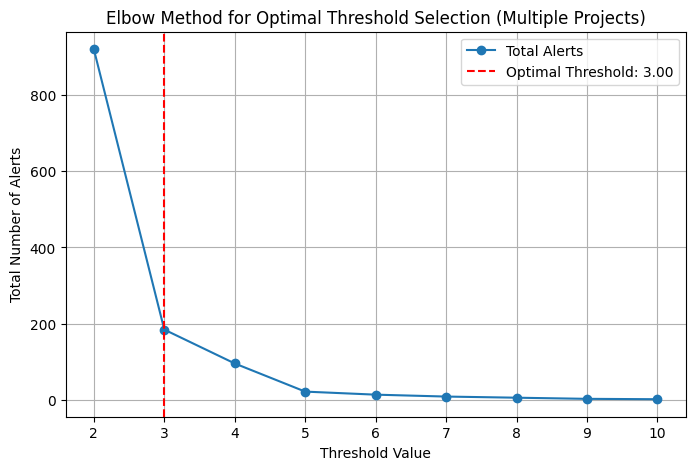

✅ Optimal threshold found: 3


In [11]:
# Find the elbow point
knee = KneeLocator(fpc_x, fpc_y, curve="convex", direction="decreasing")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(fpc_x, fpc_y, marker='o', label="Total Alerts")
plt.axvline(x=knee.knee, color='r', linestyle="--", label=f"Optimal Threshold: {knee.knee:.2f}")
plt.xlabel("Threshold Value")
plt.ylabel("Total Number of Alerts")
plt.title("Elbow Method for Optimal Threshold Selection (Multiple Projects)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Optimal threshold found: {knee.knee}")

### LCOM5

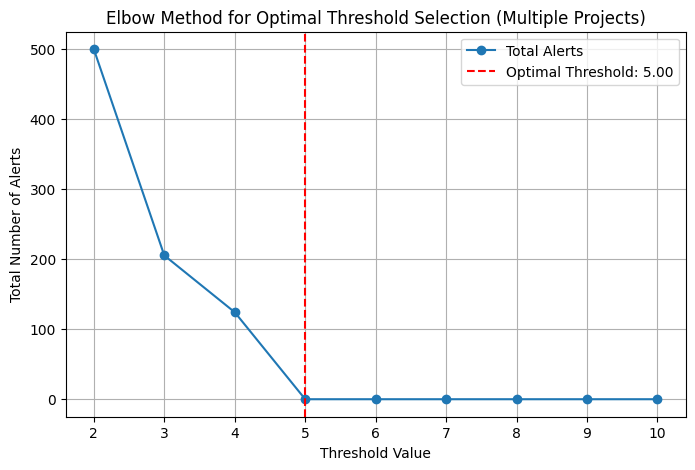

✅ Optimal threshold found: 5


In [12]:
# Find the elbow point
knee = KneeLocator(lcom_x, lcom_y, curve="convex", direction="decreasing")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lcom_x, lcom_y, marker='o', label="Total Alerts")
plt.axvline(x=knee.knee, color='r', linestyle="--", label=f"Optimal Threshold: {knee.knee:.2f}")
plt.xlabel("Threshold Value")
plt.ylabel("Total Number of Alerts")
plt.title("Elbow Method for Optimal Threshold Selection (Multiple Projects)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Optimal threshold found: {knee.knee}")